In [28]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

np.random.seed(42)

### Analisi Esplorativa dei dati

In [29]:
df = pandas.read_csv('data/corruption_df.csv')

display(df)
df.describe()

,geo,year,corruption,poverty,neet,education,unemployment,income,inequity
0,Austria,2016,36.22,14.964810,8.091438,34.540870,3.828207,62.528811,4.09
1,Belgium,2016,45.60,25.110680,13.799563,50.108248,5.316225,60.783882,3.85
2,Bulgaria,2016,3.12,29.330514,16.024476,23.464412,3.648430,32.978295,7.69
3,Cyprus,2016,4.83,1.917201,1.526974,4.767553,0.729554,52.772737,4.88
4,Czechia,2016,28.04,13.086765,11.714766,34.405528,2.743999,43.974128,3.50
...,...,...,...,...,...,...,...,...,...
157,Portugal,2021,2.06,23.068084,9.783339,48.916697,4.531231,48.953165,5.66
158,Romania,2021,20.92,66.245734,38.979374,44.739872,6.144532,37.809305,7.14
159,Sweden,2021,205.03,17.852387,6.227577,51.169924,6.746542,63.711278,4.04
160,Slovenia,2021,11.38,2.783850,1.539553,10.102000,0.653783,54.222503,3.24


,year,corruption,poverty,neet,education,unemployment,income,inequity
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2018.500000,25.572963,36.320591,23.064795,64.467123,8.095696,52.712330,4.844383
std,1.713121,40.924598,48.065890,34.141798,84.069332,12.501566,10.340572,1.202327
min,2016.000000,0.080000,0.892976,0.347262,1.544923,0.114168,30.526920,3.030000
25%,2017.000000,3.160000,7.893735,3.570964,14.613305,1.431114,44.140811,4.042500
50%,2018.500000,11.615000,14.914794,8.182723,29.957130,2.847736,53.328431,4.435000
75%,2020.000000,28.385000,30.007613,18.667848,51.700525,6.701091,62.307751,5.727500
max,2021.000000,213.550000,174.625565,148.023944,339.452221,59.443327,74.903505,8.230000


<Axes: >

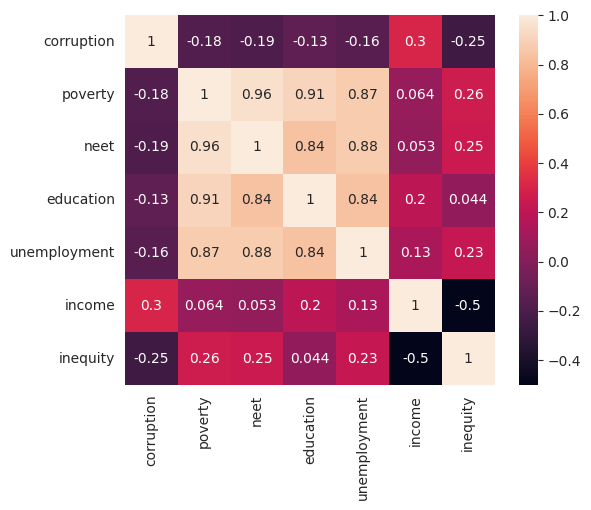

In [30]:
# Correlation Matrix
corrmat = df.drop(columns=["geo", "year"]).corr()

sns.heatmap(corrmat, square=True, annot=True)

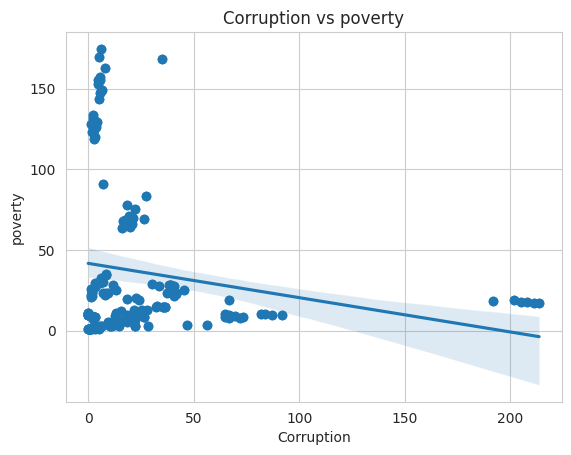

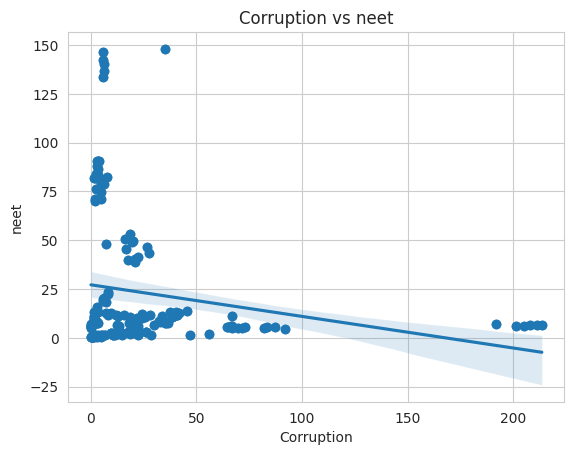

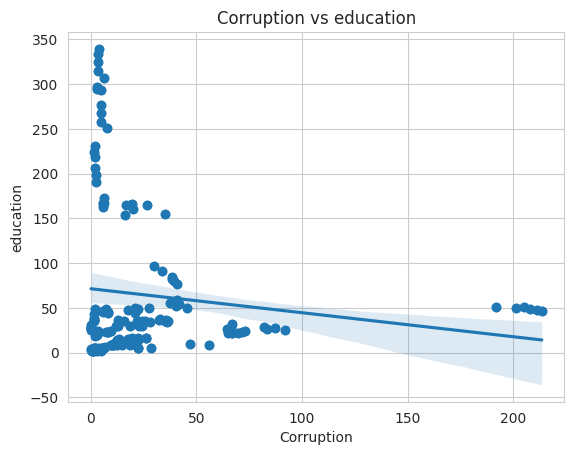

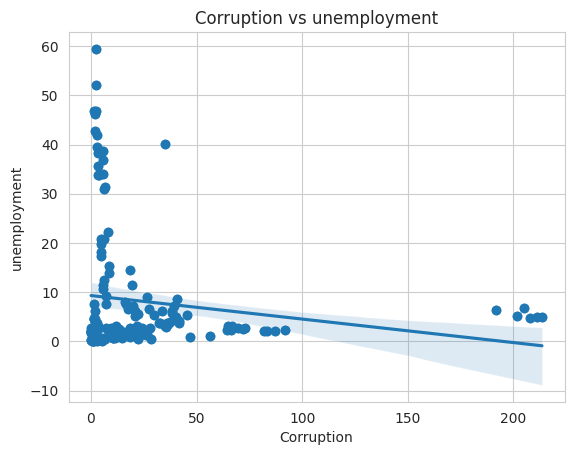

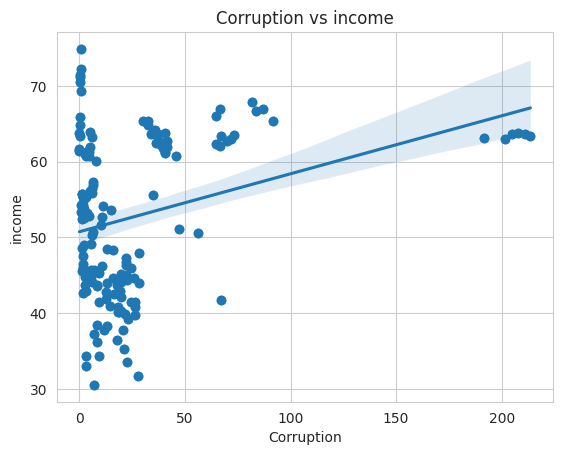

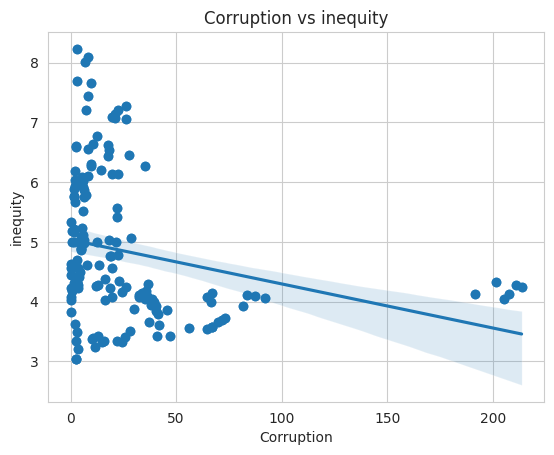

In [31]:
# Scatter Plot
features = ["poverty", "neet", "education", "unemployment", "income", "inequity"]

for feature in features:
    sns.regplot(x="corruption", y=feature, data=df)
    plt.scatter(df["corruption"], df[feature])
    plt.xlabel("Corruption")
    plt.ylabel(feature)
    plt.title("Corruption vs " + feature)
    plt.show()


# Modeling

In [32]:
X = df.drop(columns=["geo", "year", "corruption"])
y = df["corruption"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.028264559526616884

In [33]:
# ANOVA Model
model = ols("corruption ~ poverty + neet + education + unemployment + income + inequity", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq     df          F    PR(>F)
poverty          959.394690    1.0   0.644398  0.423352
neet            1641.933917    1.0   1.102841  0.295278
education       1306.809180    1.0   0.877747  0.350277
unemployment       2.902522    1.0   0.001950  0.964839
income         15373.025374    1.0  10.325626  0.001596
inequity        1494.826573    1.0   1.004033  0.317898
Residual      230767.497783  155.0        NaN       NaN


In [34]:
X2 = sm.add_constant(df.drop(columns=["geo", "year", "corruption"]))
model = sm.OLS(y, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             corruption   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     4.352
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           0.000433
Time:                        14:22:54   Log-Likelihood:                -818.06
No. Observations:                 162   AIC:                             1650.
Df Residuals:                     155   BIC:                             1672.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.5681     30.197     -0.416   

In [35]:
hypothesis_0 = "poverty = 0, neet = 0, education = 0, unemployment = 0, income = 0, inequity = 0"
print(results.t_test(hypothesis_0))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2643      0.329      0.803      0.423      -0.386       0.915
c1            -0.3674      0.350     -1.050      0.295      -1.059       0.324
c2            -0.1055      0.113     -0.937      0.350      -0.328       0.117
c3             0.0252      0.570      0.044      0.965      -1.100       1.150
c4             1.1491      0.358      3.213      0.002       0.443       1.855
c5            -3.5007      3.494     -1.002      0.318     -10.402       3.401


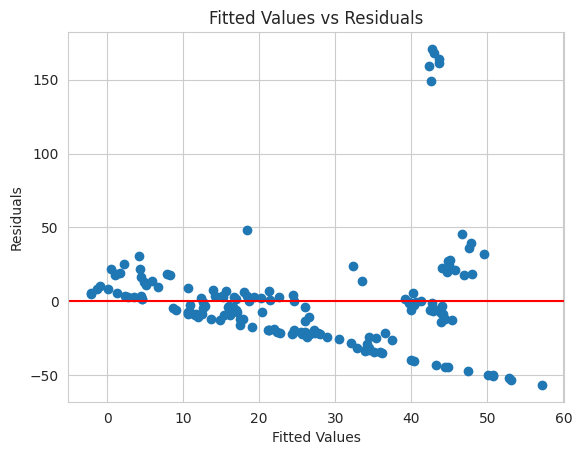

In [36]:
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values vs Residuals")
plt.axhline(y=0, color="red")
plt.show()

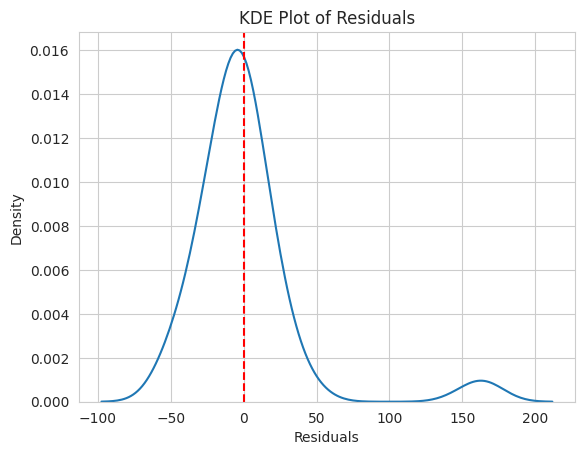

In [37]:
# KDE Plot of residuals
sns.kdeplot(results.resid)
plt.axvline(results.resid.mean(), linestyle='dashed', color="red")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("KDE Plot of Residuals")
plt.show()

### Top 5 regions with the highest corruption in total

In [39]:
data = df.drop(columns=["poverty", "neet", "education", "unemployment", "income", "inequity"])
display(data.groupby("geo").sum().sort_values(by="corruption", ascending=False).head(5))

,year,corruption
geo,,
Sweden,12111,1230.60
Denmark,12111,475.64
Finland,12111,413.14
Belgium,12111,247.28
Netherlands,12111,220.82


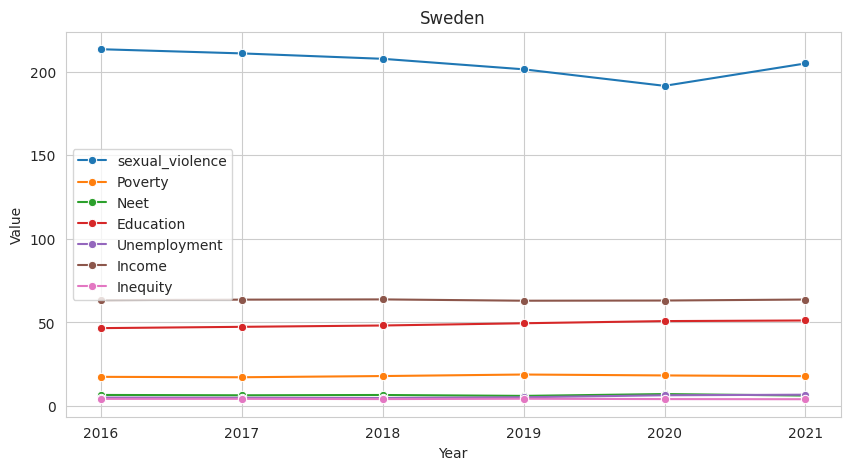

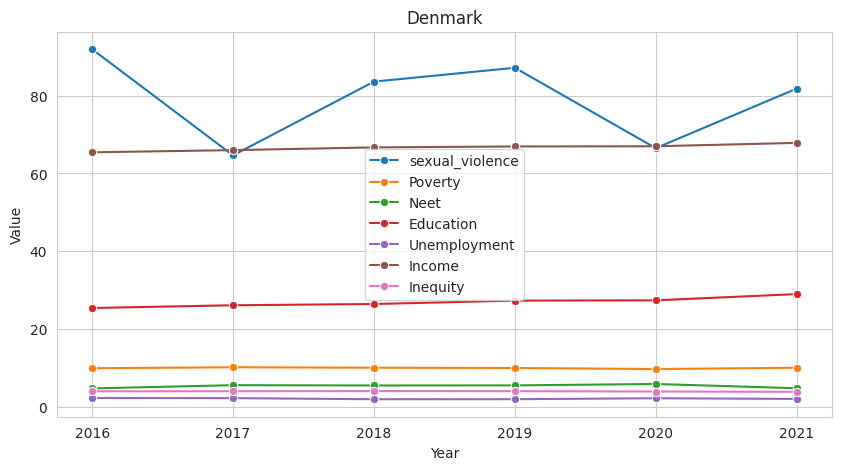

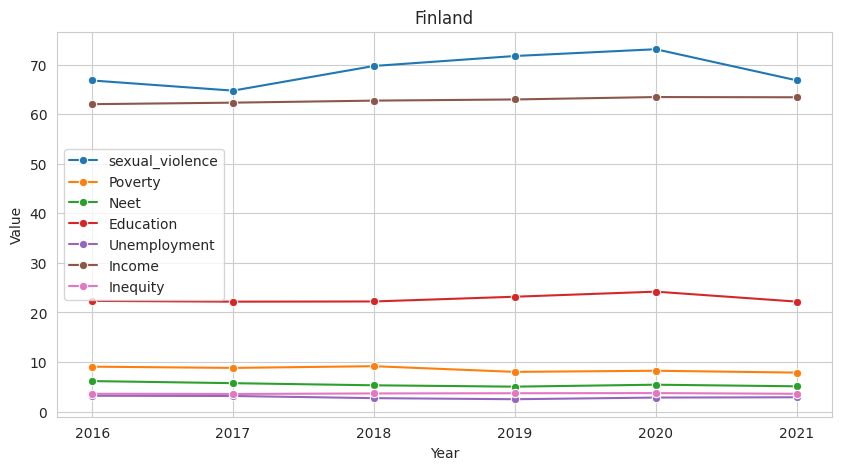

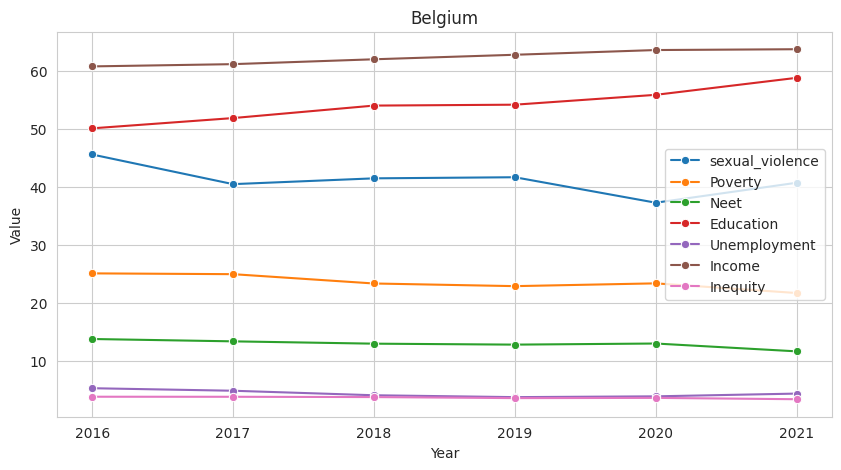

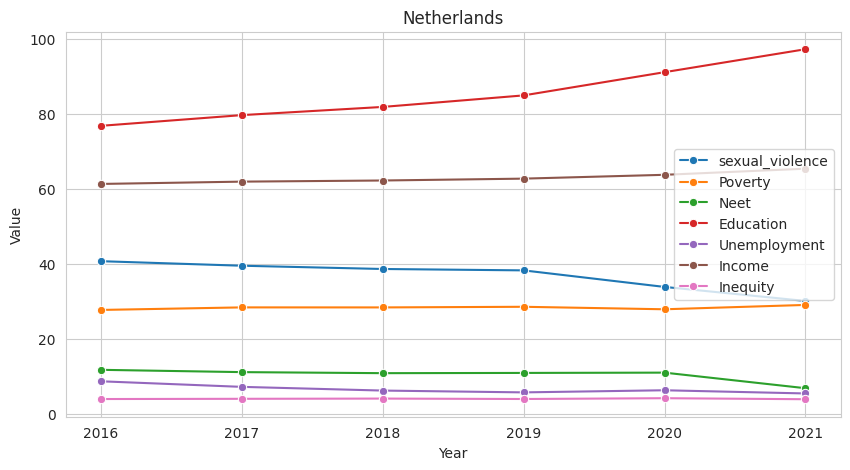

In [40]:
# Data Visualization

sweden = df[df["geo"] == "Sweden"]
danmark = df[df["geo"] == "Denmark"]
finland = df[df["geo"] == "Finland"]
belgium = df[df["geo"] == "Belgium"]
netherlands = df[df["geo"] == "Netherlands"]

countries = [sweden, danmark, finland, belgium, netherlands]

for country in countries:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="year", y="corruption", data=country, label="sexual_violence", marker="o")
    sns.lineplot(x="year", y="poverty", data=country, label="Poverty", marker="o")
    sns.lineplot(x="year", y="neet", data=country, label="Neet", marker="o")
    sns.lineplot(x="year", y="education", data=country, label="Education", marker="o")
    sns.lineplot(x="year", y="unemployment", data=country, label="Unemployment", marker="o")
    sns.lineplot(x="year", y="income", data=country, label="Income", marker="o")
    sns.lineplot(x="year", y="inequity", data=country, label="Inequity", marker="o")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.title(country["geo"].iloc[0])
    plt.show()